# Installing libraries and dependencies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import re
import nltk
import string
import zipfile
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Loading the data from the given file path

In [ ]:
file_path = '/content/drive/MyDrive/emails.csv'
df = pd.read_csv(file_path)
df = df.sample(frac=1, random_state=23)
df

,text,spam
3493,"Subject: financial mathematics - houston , aug...",0
4902,"Subject: final details for energy course hi ,...",0
1951,Subject: improved process for engaging tempora...,0
916,Subject: guaranteed best mortgage rate the b...,1
1531,Subject: enron : wefa luncheon may 1 martin :...,0
...,...,...
2998,Subject: re : enron / stanford program vince ...,0
1993,Subject: re : interview with enron corp . cli...,0
1064,"Subject: more than 100 , 000 u . s . jobs avai...",1
4838,Subject: updated message - preliminary ranking...,0


In [ ]:
df.iloc[0,0]

'Subject: financial mathematics - houston , august 31 and september 1  ?  - speaker chase - vince kaminski . doc'

In [ ]:
print(df.describe())
print(df.groupby('spam').describe())

              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
      text                                                               
     count unique                                                top freq
spam                                                                     
0     4360   4327  Subject: departure of grant masson  the resear...    2
1     1368   1368  Subject: guaranteed best mortgage rate  the  b...    1


# Preprocessing

In [ ]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,
                      remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

# Apply the clean_up_pipeline function to the 'text' column
df['clean_text_1'] = df['text'].apply(clean_up_pipeline)

# Print the cleaned DataFrame
df

,text,spam,clean_text_1
3493,"Subject: financial mathematics - houston , aug...",0,subject financial mathematics houston august...
4902,"Subject: final details for energy course hi ,...",0,subject final details for energy course hi ...
1951,Subject: improved process for engaging tempora...,0,subject improved process for engaging temporar...
916,Subject: guaranteed best mortgage rate the b...,1,subject guaranteed best mortgage rate the be...
1531,Subject: enron : wefa luncheon may 1 martin :...,0,subject enron wefa luncheon may martin vi...
...,...,...,...
2998,Subject: re : enron / stanford program vince ...,0,subject re enron stanford program vince i...
1993,Subject: re : interview with enron corp . cli...,0,subject re interview with enron corp cliff ...
1064,"Subject: more than 100 , 000 u . s . jobs avai...",1,subject more than u s jobs available are...
4838,Subject: updated message - preliminary ranking...,0,subject updated message preliminary rankings ...


In [ ]:
# Download NLTK resources (stopwords corpus and WordNet)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text if word.lower() not in stop_words]

# Define function to perform stemming
def stem_words(text):
    return [stemmer.stem(word) for word in text]

# Define function to perform lemmatization
def lemmatize_words(text):
    return [lemmatizer.lemmatize(word) for word in text]

# Define function to process text
def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = remove_stopwords(tokens)

    # Perform stemming
    stemmed_tokens = stem_words(filtered_tokens)

    # Perform lemmatization
    lemmatized_tokens = lemmatize_words(stemmed_tokens)

    return filtered_tokens, stemmed_tokens, lemmatized_tokens

# Apply text processing and create new columns
df['filtered_tokens'], df['stemmed_tokens'], df['lemmatized_tokens'] = zip(*df['clean_text_1'].apply(process_text))

df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,text,spam,clean_text_1,filtered_tokens,stemmed_tokens,lemmatized_tokens
3493,"Subject: financial mathematics - houston , aug...",0,subject financial mathematics houston august...,"[subject, financial, mathematics, houston, aug...","[subject, financi, mathemat, houston, august, ...","[subject, financi, mathemat, houston, august, ..."
4902,"Subject: final details for energy course hi ,...",0,subject final details for energy course hi ...,"[subject, final, details, energy, course, hi, ...","[subject, final, detail, energi, cours, hi, wa...","[subject, final, detail, energi, cours, hi, wa..."
1951,Subject: improved process for engaging tempora...,0,subject improved process for engaging temporar...,"[subject, improved, process, engaging, tempora...","[subject, improv, process, engag, temporari, w...","[subject, improv, process, engag, temporari, w..."
916,Subject: guaranteed best mortgage rate the b...,1,subject guaranteed best mortgage rate the be...,"[subject, guaranteed, best, mortgage, rate, be...","[subject, guarante, best, mortgag, rate, best,...","[subject, guarante, best, mortgag, rate, best,..."
1531,Subject: enron : wefa luncheon may 1 martin :...,0,subject enron wefa luncheon may martin vi...,"[subject, enron, wefa, luncheon, may, martin, ...","[subject, enron, wefa, luncheon, may, martin, ...","[subject, enron, wefa, luncheon, may, martin, ..."
...,...,...,...,...,...,...
2998,Subject: re : enron / stanford program vince ...,0,subject re enron stanford program vince i...,"[subject, enron, stanford, program, vince, man...","[subject, enron, stanford, program, vinc, mana...","[subject, enron, stanford, program, vinc, mana..."
1993,Subject: re : interview with enron corp . cli...,0,subject re interview with enron corp cliff ...,"[subject, interview, enron, corp, cliff, thank...","[subject, interview, enron, corp, cliff, thank...","[subject, interview, enron, corp, cliff, thank..."
1064,"Subject: more than 100 , 000 u . s . jobs avai...",1,subject more than u s jobs available are...,"[subject, u, jobs, available, looking, job, pl...","[subject, u, job, avail, look, job, plan, care...","[subject, u, job, avail, look, job, plan, care..."
4838,Subject: updated message - preliminary ranking...,0,subject updated message preliminary rankings ...,"[subject, updated, message, preliminary, ranki...","[subject, updat, messag, preliminari, rank, no...","[subject, updat, messag, preliminari, rank, no..."


In [ ]:
df['length'] = df['lemmatized_tokens'].map(lambda text: len(text))
df

,text,spam,clean_text_1,filtered_tokens,stemmed_tokens,lemmatized_tokens,length
3493,"Subject: financial mathematics - houston , aug...",0,subject financial mathematics houston august...,"[subject, financial, mathematics, houston, aug...","[subject, financi, mathemat, houston, august, ...","[subject, financi, mathemat, houston, august, ...",11
4902,"Subject: final details for energy course hi ,...",0,subject final details for energy course hi ...,"[subject, final, details, energy, course, hi, ...","[subject, final, detail, energi, cours, hi, wa...","[subject, final, detail, energi, cours, hi, wa...",75
1951,Subject: improved process for engaging tempora...,0,subject improved process for engaging temporar...,"[subject, improved, process, engaging, tempora...","[subject, improv, process, engag, temporari, w...","[subject, improv, process, engag, temporari, w...",121
916,Subject: guaranteed best mortgage rate the b...,1,subject guaranteed best mortgage rate the be...,"[subject, guaranteed, best, mortgage, rate, be...","[subject, guarante, best, mortgag, rate, best,...","[subject, guarante, best, mortgag, rate, best,...",108
1531,Subject: enron : wefa luncheon may 1 martin :...,0,subject enron wefa luncheon may martin vi...,"[subject, enron, wefa, luncheon, may, martin, ...","[subject, enron, wefa, luncheon, may, martin, ...","[subject, enron, wefa, luncheon, may, martin, ...",193
...,...,...,...,...,...,...,...
2998,Subject: re : enron / stanford program vince ...,0,subject re enron stanford program vince i...,"[subject, enron, stanford, program, vince, man...","[subject, enron, stanford, program, vinc, mana...","[subject, enron, stanford, program, vinc, mana...",232
1993,Subject: re : interview with enron corp . cli...,0,subject re interview with enron corp cliff ...,"[subject, interview, enron, corp, cliff, thank...","[subject, interview, enron, corp, cliff, thank...","[subject, interview, enron, corp, cliff, thank...",169
1064,"Subject: more than 100 , 000 u . s . jobs avai...",1,subject more than u s jobs available are...,"[subject, u, jobs, available, looking, job, pl...","[subject, u, job, avail, look, job, plan, care...","[subject, u, job, avail, look, job, plan, care...",82
4838,Subject: updated message - preliminary ranking...,0,subject updated message preliminary rankings ...,"[subject, updated, message, preliminary, ranki...","[subject, updat, messag, preliminari, rank, no...","[subject, updat, messag, preliminari, rank, no...",102


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

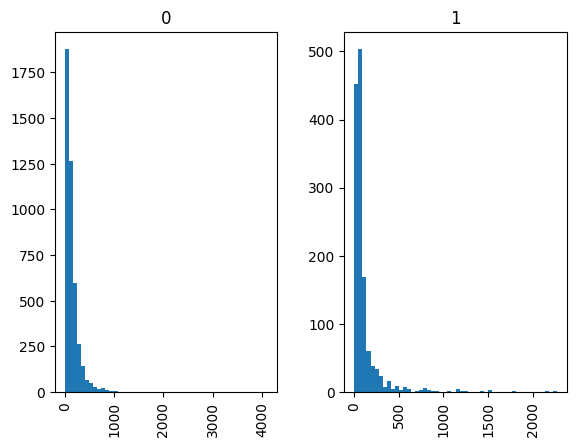

In [ ]:
df.hist(column='length', by='spam', bins=50)

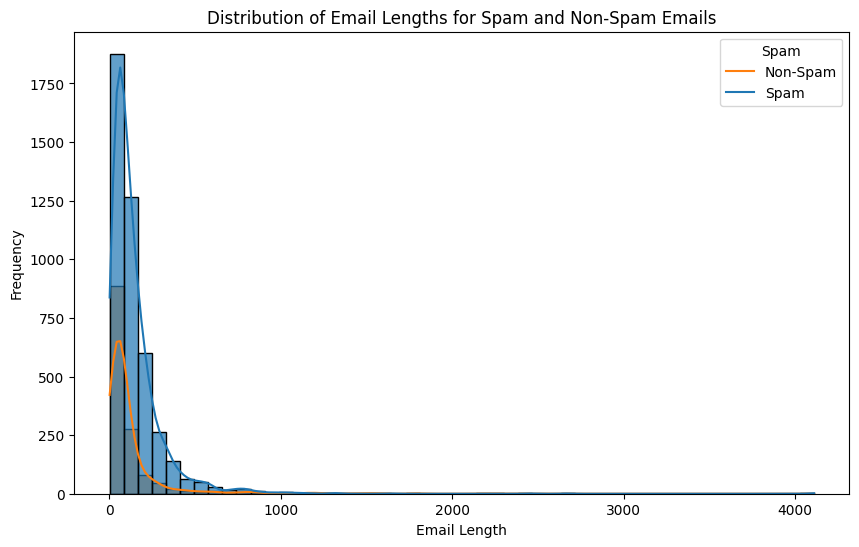

In [ ]:
# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot distribution of email lengths for spam and non-spam emails
sns.histplot(data=df, x='length', hue='spam', bins=50, kde=True, alpha=0.7)

# Add labels and title
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Distribution of Email Lengths for Spam and Non-Spam Emails')

# Show legend
plt.legend(title='Spam', labels=['Non-Spam', 'Spam'])

# Show the plot
plt.show()

In [ ]:
# Select columns in the desired order
selected_columns = ['lemmatized_tokens', 'spam']

# Create a new DataFrame with selected columns
new_df = df.loc[:, selected_columns]

# Print the new DataFrame
new_df

,lemmatized_tokens,spam
3493,"[subject, financi, mathemat, houston, august, ...",0
4902,"[subject, final, detail, energi, cours, hi, wa...",0
1951,"[subject, improv, process, engag, temporari, w...",0
916,"[subject, guarante, best, mortgag, rate, best,...",1
1531,"[subject, enron, wefa, luncheon, may, martin, ...",0
...,...,...
2998,"[subject, enron, stanford, program, vinc, mana...",0
1993,"[subject, interview, enron, corp, cliff, thank...",0
1064,"[subject, u, job, avail, look, job, plan, care...",1
4838,"[subject, updat, messag, preliminari, rank, no...",0


In [ ]:
# Function to join word lists together
def join_word_lists(words):
    return ' '.join(words)

# Apply the function to the specified column
new_df['preprocessed_text'] = new_df['lemmatized_tokens'].apply(join_word_lists)

new_df

,lemmatized_tokens,spam,preprocessed_text
3493,"[subject, financi, mathemat, houston, august, ...",0,subject financi mathemat houston august septem...
4902,"[subject, final, detail, energi, cours, hi, wa...",0,subject final detail energi cours hi want let ...
1951,"[subject, improv, process, engag, temporari, w...",0,subject improv process engag temporari worker ...
916,"[subject, guarante, best, mortgag, rate, best,...",1,subject guarante best mortgag rate best mortag...
1531,"[subject, enron, wefa, luncheon, may, martin, ...",0,subject enron wefa luncheon may martin vinc la...
...,...,...,...
2998,"[subject, enron, stanford, program, vinc, mana...",0,subject enron stanford program vinc manag chan...
1993,"[subject, interview, enron, corp, cliff, thank...",0,subject interview enron corp cliff thank repli...
1064,"[subject, u, job, avail, look, job, plan, care...",1,subject u job avail look job plan career chang...
4838,"[subject, updat, messag, preliminari, rank, no...",0,subject updat messag preliminari rank norma se...


In [ ]:
# Create a CountVectorizer using the 'lemmatized_text' column
bow_transformer = CountVectorizer().fit(new_df['preprocessed_text'])

# Get the vocabulary size
print(len(bow_transformer.vocabulary_))

25552


In [ ]:
new_df_bow = bow_transformer.transform(new_df['preprocessed_text'])
print('sparse matrix shape:', new_df_bow.shape)
print('number of non-zeros:', new_df_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * new_df_bow.nnz / (new_df_bow.shape[0] * new_df_bow.shape[1])))

sparse matrix shape: (5728, 25552)
number of non-zeros: 473068
sparsity: 0.32%


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(new_df_bow)
new_df_tfidf = tfidf_transformer.transform(new_df_bow)
print(new_df_tfidf.shape)

(5728, 25552)


# Splitting the data into train/validation/test

In [ ]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(new_df['preprocessed_text'], new_df['spam'], test_size=0.2, random_state=42)

# Split the training data into train and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the sizes of the splits
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 3436
Validation set size: 1146
Test set size: 1146


# Storing the splits at train.csv/validation.csv/test.csv

In [ ]:
# Save train, validation, and test sets to CSV files
X_train.to_csv('train.csv', index=False, header=True)
X_val.to_csv('validation.csv', index=False, header=True)
X_test.to_csv('test.csv', index=False, header=True)

# Optional: Save target data to CSV files
y_train.to_csv('train_labels.csv', index=False, header=True)
y_val.to_csv('validation_labels.csv', index=False, header=True)
y_test.to_csv('test_labels.csv', index=False, header=True)

In [ ]:
csv_files = ['train.csv', 'validation.csv', 'test.csv', 'train_labels.csv', 'validation_labels.csv', 'test_labels.csv']

# Zip file name
zip_filename = '/content/drive/My Drive/emailspam_splits.zip'

# Create a zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in csv_files:
        zipf.write(file)

# Check if the zip file is created successfully
if os.path.exists(zip_filename):
    print("Zip file created successfully:", zip_filename)
else:
    print("Error: Zip file creation failed.")

# Unmount Google Drive
drive.flush_and_unmount()
print('Drive unmounted.')

Zip file created successfully: /content/drive/My Drive/emailspam_splits.zip
Drive unmounted.
